3.1 퍼셉트론 : 가장 간단한 신경망

In [15]:
# 파이토치로 구현한 퍼셉트론
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """ 퍼셉트론은 하나의 선형 층입니다 """

    def __init__(self, input_dim):
        """
        매개변수:
            input_dim (int): 입력 특성의 크기
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """퍼셉트론의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서
                x_in.shape는 (batch, num_features)입니다.
        반환값:
            결과 텐서. tensor.shape는 (batch,)입니다.
        """
        return torch.sigmoid(self.fc1(x_in))

3.2.1 시그모이드

<ipython-input-16-9fdbf801b941>:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


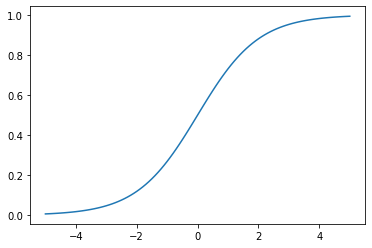

In [16]:
# 시그모이드 활성화 함수
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

3.2.2 하이퍼볼릭 탄젠트

<ipython-input-17-7626237f4907>:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


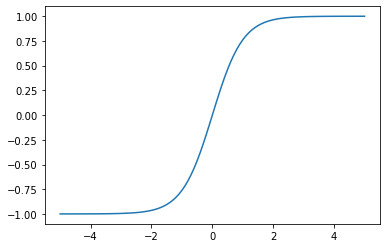

In [17]:
#  하이퍼볼릭 탄젠트 활성화 함수
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

3.2.3 렐루

<ipython-input-18-7982910c856c>:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


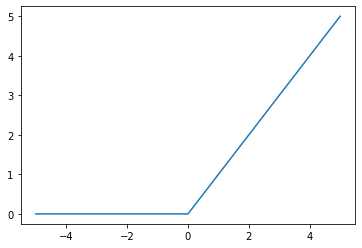

In [18]:
#  렐루 활성화 함수
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

<ipython-input-19-08597fc79abc>:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


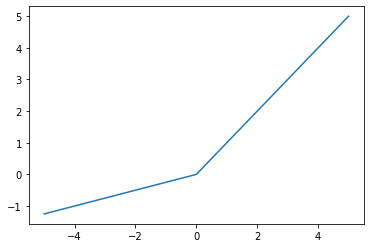

In [19]:
#  PReLU 활성화 함수
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

3.2.4 소프트맥스

In [20]:
# 소프트맥스 활성화 함수
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)

print("x_input : ", x_input)
print("y_output : ", y_output)
print(torch.sum(y_output, dim=1))

x_input :  tensor([[ 0.4431,  0.9000, -0.7718]])
y_output :  tensor([[0.3477, 0.5491, 0.1032]])
tensor([1.])


3.3 손실 함수

In [21]:
# 평균 제곱 오차 손실
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)

print(loss)

tensor(3.1700, grad_fn=<MseLossBackward>)


3.3.2 범주형 크로스 엔트로피 손실

In [22]:
# 크로스 엔트로피 손실
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)

print(loss)

tensor(2.2444, grad_fn=<NllLossBackward>)


3.3.3 이진 크로스 엔트로피 손실

In [23]:
# 이진 크로스 엔트로피 손실
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
loss.backward()

print(probabilities)
print(loss)

tensor([[0.5945],
        [0.8218],
        [0.1768],
        [0.2416]], grad_fn=<SigmoidBackward>)
tensor(1.0636, grad_fn=<BinaryCrossEntropyBackward>)


3.4.5 옵티마이저 선택

In [24]:
# Adam 옵티마이저 준비
import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

3.4.6 모두 합치기: 그레디언트 기반의 지도 학습

In [25]:
# 퍼셉트론과 이진 분류를 위한 지도 학습 훈련 반복
# 각 에포크는 전체 훈련 데이터를 사용합니다
for epoch_i in range(n_epochs):
    # 내부 반복은 데이터셋에 있는 배치에 대해 수행됩니다
    for batch_i in range(n_batches):
        # 0단계: 데이터 가져오기
        x_data, y_target = get_toy_data(batch_size)
        # 1단계: 그레디언트 초기화
        perceptron.zero_grad()
        # 2단계: 모델의 정방향 계산 수행하기
        y_pred = perceptron(x_data, apply_sigmoid=True)
        # 3단계: 최적화하려는 필요한 손실 계산하기
        loss = bce_loss(y_pred, y_target)
        # 4단계: 손실 신호를 거꾸로 전파하기 (역전파)
        loss.backward()
        # 5단계: 옵티마이저로 업데이트하기
        optimizer.step()

3.6.1 옐프 리뷰 데이터셋

In [ ]:
# 훈련, 검증, 테스트 세트 만들기
# 훈련, 검증, 테스트를 만들기 위해 별점을 기준으로 나눕니다
by_rating = collections.defaultdict(list)

for _, row in train_reviews.iterrows():
    by_rating[row.rating].append(row.to_dict())
    
# 분할 데이터를 만듭니다.
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    
    # 데이터 포인터에 분할 속성을 추가합니다
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'

    # 최종 리스트에 추가합니다
    final_list.extend(item_list)

final_reviews = pd.DataFrame(final_list)

In [ ]:
# 최소한의 데이터 정제 작업
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text

final_reviews.review = final_reviews.review.apply(preprocess_text)

In [ ]:
# 옐프 리뷰 데이터를 위한 파이토치 데이터셋 클래스
from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        매개변수:
            review_df (pandas.DataFrame): 데이터셋
            vectorizer (ReviewVectorizer): ReviewVectorizer 객체
        """
        self.review_df = review_df
        self._vectorizer = vectorizer

        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """ 데이터셋을 로드하고 새로운 ReviewVectorizer 객체를 만듭니다
        
        매개변수:
            review_csv (str): 데이터셋의 위치
        반환값:
            ReviewDataset의 인스턴스
        """
        review_df = pd.read_csv(review_csv)
        train_review_df = review_df[review_df.split=='train']
        return cls(review_df, ReviewVectorizer.from_dataframe(train_review_df))
    
    @classmethod
    def load_dataset_and_load_vectorizer(cls, review_csv, vectorizer_filepath):
        """ 데이터셋을 로드하고 새로운 ReviewVectorizer 객체를 만듭니다.
        캐시된 ReviewVectorizer 객체를 재사용할 때 사용합니다.
        
        매개변수:
            review_csv (str): 데이터셋의 위치
            vectorizer_filepath (str): ReviewVectorizer 객체의 저장 위치
        반환값:
            ReviewDataset의 인스턴스
        """
        review_df = pd.read_csv(review_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(review_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """ 파일에서 ReviewVectorizer 객체를 로드하는 정적 메서드
        
        매개변수:
            vectorizer_filepath (str): 직렬화된 ReviewVectorizer 객체의 위치
        반환값:
            ReviewVectorizer의 인스턴스
        """
        with open(vectorizer_filepath) as fp:
            return ReviewVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """ ReviewVectorizer 객체를 json 형태로 디스크에 저장합니다
        
        매개변수:
            vectorizer_filepath (str): ReviewVectorizer 객체의 저장 위치
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ 벡터 변환 객체를 반환합니다 """
        return self._vectorizer

    def set_split(self, split="train"):
        """ 데이터프레임에 있는 열을 사용해 분할 세트를 선택합니다 
        
        매개변수:
            split (str): "train", "val", "test" 중 하나
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """ 파이토치 데이터셋의 주요 진입 메서드
        
        매개변수:
            index (int): 데이터 포인트의 인덱스
        반환값:
            데이터 포인트의 특성(x_data)과 레이블(y_target)로 이루어진 딕셔너리
        """
        row = self._target_df.iloc[index]

        review_vector = \
            self._vectorizer.vectorize(row.review)

        rating_index = \
            self._vectorizer.rating_vocab.lookup_token(row.rating)

        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        """ 배치 크기가 주어지면 데이터셋으로 만들 수 있는 배치 개수를 반환합니다
        
        매개변수:
            batch_size (int)
        반환값:
            배치 개수
        """
        return len(self) // batch_size

In [ ]:
# 머신러닝 파이프라인에 필요한 토근과 정수 매핑을 관리하는 Vocabulary 클래스
class Vocabulary(object):
    """ 매핑을 위해 텍스트를 처리하고 어휘 사전을 만드는 클래스 """

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        매개변수:
            token_to_idx (dict): 기존 토큰-인덱스 매핑 딕셔너리
            add_unk (bool): UNK 토큰을 추가할지 지정하는 플래그
            unk_token (str): Vocabulary에 추가할 UNK 토큰
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ 직렬화할 수 있는 딕셔너리를 반환합니다 """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        """ 직렬화된 딕셔너리에서 Vocabulary 객체를 만듭니다 """
        return cls(**contents)

    def add_token(self, token):
        """ 토큰을 기반으로 매핑 딕셔너리를 업데이트합니다

        매개변수:
            token (str): Vocabulary에 추가할 토큰
        반환값:
            index (int): 토큰에 상응하는 정수
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def add_many(self, tokens):
        """ 토큰 리스트를 Vocabulary에 추가합니다.
        
        매개변수:
            tokens (list): 문자열 토큰 리스트
        반환값:
            indices (list): 토큰 리스트에 상응되는 인덱스 리스트
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """ 토큰에 대응하는 인덱스를 추출합니다.
        토큰이 없으면 UNK 인덱스를 반환합니다.
        
        매개변수:
            token (str): 찾을 토큰 
        반환값:
            index (int): 토큰에 해당하는 인덱스
        노트:
            UNK 토큰을 사용하려면 (Vocabulary에 추가하기 위해)
            `unk_index`가 0보다 커야 합니다.
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """ 인덱스에 해당하는 토큰을 반환합니다.
        
        매개변수: 
            index (int): 찾을 인덱스
        반환값:
            token (str): 인텍스에 해당하는 토큰
        에러:
            KeyError: 인덱스가 Vocabulary에 없을 때 발생합니다.
        """
        if index not in self._idx_to_token:
            raise KeyError("Vocabulary에 인덱스(%d)가 없습니다." % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
# 텍스트를 수치 벡터로 변환하는 Vectorizer 클래스
class ReviewVectorizer(object):
    """ 어휘 사전을 생성하고 관리합니다 """
    def __init__(self, review_vocab, rating_vocab):
        """
        매개변수:
            review_vocab (Vocabulary): 단어를 정수에 매핑하는 Vocabulary
            rating_vocab (Vocabulary): 클래스 레이블을 정수에 매핑하는 Vocabulary
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """ 리뷰에 대한 웟-핫 벡터를 만듭니다
        
        매개변수:
            review (str): 리뷰
        반환값:
            one_hot (np.ndarray): 원-핫 벡터
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """ 데이터셋 데이터프레임에서 Vectorizer 객체를 만듭니다
        
        매개변수:
            review_df (pandas.DataFrame): 리뷰 데이터셋
            cutoff (int): 빈도 기반 필터링 설정값
        반환값:
            ReviewVectorizer 객체
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        # 점수를 추가합니다
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # count > cutoff인 단어를 추가합니다
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """ 직렬화된 딕셔너리에서 ReviewVectorizer 객체를 만듭니다
        
        매개변수:
            contents (dict): 직렬화된 딕셔너리
        반환값:
            ReviewVectorizer 클래스 객체
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """ 캐싱을 위해 직렬화된 딕셔너리를 만듭니다
        
        반환값:
            contents (dict): 직렬화된 딕셔너리
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

In [ ]:
# 데이터셋에서 미니배치 생성하기
from torch.utils.data import DataLoader

def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    파이토치 DataLoader를 감싸고 있는 제너레이터 함수.
    걱 텐서를 지정된 장치로 이동합니다.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
            
        yield out_data_dict

3.6.4 퍼셉트론 분류기

In [ ]:
# 옐프 리뷰를 분류하는 퍼셉트론 분류기
class ReviewClassifier(nn.Module):
    """ 간단한 퍼셉트론 기반 분류기 """
    def __init__(self, num_features):
        """
        매개변수:
            num_features (int): 입력 특성 벡트의 크기
        """
        super(ReviewClassifier, self).__init__()
        
        self.fc1 = nn.Linear(in_features=num_features, 
                             out_features=1)

    def forward(self, x_in, apply_sigmoid=False):
        """ 분류기의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서 
                x_in.shape는 (batch, num_features)입니다.
            apply_sigmoid (bool): 시그모이드 활성화 함수를 위한 플래그
                크로스-엔트로피 손실을 사용하려면 False로 지정합니다
        반환값:
            결과 텐서. tensor.shape은 (batch,)입니다.
        """
        y_out = self.fc1(x_in).squeeze()
        
        if apply_sigmoid:
            y_out = torch.sigmoid(y_out)
            
        return y_out

3.6.5 모델 훈련

In [ ]:
# 퍼셉트론 기반 옐프 리뷰 분류기를 위한 하이퍼파라미터와 프로그램 옵션
args = Namespace(
    # 날짜와 경로 정보
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv='data/yelp/reviews_with_splits_lite.csv',
    # review_csv='data/yelp/reviews_with_splits_full.csv',
    save_dir='model_storage/ch3/yelp/',
    vectorizer_file='vectorizer.json',
    # 모델 하이퍼파라미터 없음
    # 훈련 하이퍼파라미터
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    # 실행 옵션은 생략했습니다
)

In [ ]:
# 데이터셋, 모델, 손실, 옵티마이저, 훈련 상태 딕셔너리 만들기
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

if no torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")

# 데이터셋과 Vectorizer
dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
vectorizer = dataset.get_vectorizer()

# 모델
classifier = ReviewClassifier(num_features = len(vectorizer.review_vocab))
classifier = classifier.to(args.device)

# 손실 함수와 옵티마이저
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)

In [ ]:
# 훈련 반복
for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # 훈련 세트에 대한 순회

        # 훈련 세트와 배치 제너레이터 준비, 손실과 정확도를 0으로 설정
        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # 훈련 과정은 5단계로 이루어집니다

            # --------------------------------------
            # 단계 1. 그레이디언트를 0으로 초기화합니다
            optimizer.zero_grad()

            # 단계 2. 출력을 계산합니다
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # 단계 3. 손실을 계산합니다
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # 단계 4. 손실을 사용해 그레이디언트를 계산합니다
            loss.backward()

            # 단계 5. 옵티마이저로 가중치를 업데이트합니다
            optimizer.step()
            # -----------------------------------------
            
            # 정확도를 계산합니다
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # 진행 바 업데이트
            train_bar.set_postfix(loss=running_loss, 
                                  acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # 검증 세트에 대한 순회

        # 검증 세트와 배치 제너레이터 준비, 손실과 정확도를 0으로 설정
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # 단계 1. 출력을 계산합니다
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # 단계 2. 손실을 계산합니다
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # 단계 3. 정확도를 계산합니다
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            
            val_bar.set_postfix(loss=running_loss, 
                                acc=running_acc, 
                                epoch=epoch_index)
            val_bar.update()

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)

3.6.6 평가, 추론, 분석

In [ ]:
dataset.set_split('test')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # 출력을 계산합니다
    y_pred = classifier(x_in=batch_dict['x_data'].float())

    # 손실을 계산합니다
    loss = loss_func(y_pred, batch_dict['y_target'].float())
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # 정확도를 계산합니다
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

In [ ]:
# 샘플 리뷰에 대한 예측 출력하기
def predict_rating(review, classifier, vectorizer, decision_threshold=0.5):
    """ 리뷰 점수 예측하기
    
    매개변수:
        review (str): 리뷰 텍스트
        classifier (ReviewClassifier): 훈련된 모델
        vectorizer (ReviewVectorizer): Vectorizer 객체
        decision_threshold (float): 클래스를 나눌 결정 경계
    """
    review = preprocess_text(review)
    
    vectorized_review = torch.tensor(vectorizer.vectorize(review))
    result = classifier(vectorized_review.view(1, -1))
    
    probability_value = torch.sigmoid(result).item()
    index = 1
    if probability_value < decision_threshold:
        index = 0

    return vectorizer.rating_vocab.lookup_index(index)

In [ ]:
# 분류기의 가중치 분석하기
# 가중치 정렬
fc1_weights = classifier.fc1.weight.detach()[0]
_, indices = torch.sort(fc1_weights, dim=0, descending=True)
indices = indices.numpy().tolist()

# 긍정적인 상위 20개 단어
print("긍정 리뷰에 영향을 미치는 단어:")
print("--------------------------------------")

for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))
    
print("====\n\n\n")

# 부정적인 상위 20개 단어
print("부정 리뷰에 영향을 미치는 단어:")
print("--------------------------------------")
indices.reverse()

for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))